## Контрольная работа №2  (Вариант 5)
 <p align: left> © Maxim Blyzen 05-108 </p>

### Задание 1: Для $ f(x),x  \in [a,b] $ построить интерполяционный сплайн <br> первой степени по следующим узлам:
##### 1)  $ x_ {k} = a + k \frac {b-a}{4} $, k = $ \overline{0, 4}$



In [32]:
import sympy as sp # библиотека символьных вычислений  

##### Определим отрезок интерполирования $[a,b]$

In [33]:
a, b = -1, 1
nodes = [a + k*(b-a)/4 for k in range(0,5)]
print("Узлы: {}".format(nodes))

Узлы: [-1.0, -0.5, 0.0, 0.5, 1.0]


#### Определим целевую функцию 

In [34]:
def f(x):
    func = sp.exp(x/2) + sp.cosh(sp.together((x+1)/2)) #type: ignore 
    return func
x = sp.Symbol('x')
print("Целевая функция: ")
sp.together(f(x))

Целевая функция: 


exp(x/2) + cosh((x + 1)/2)

In [35]:
# На вход подаётся список узлов nodes и индекс фундаментального полинома k
def l(nodes, k):
    l_k = 1
    for j in range(len(nodes)):
        if j==k:
            continue
        l_k*= (x - nodes[j])/(nodes[k] - nodes[j]) #
    return sp.expand(l_k)
# Функция построения интерполяционного полинома Лагранжа по данным узлам и функции
def L(func, nodes):
    return sum([l(nodes, k)* func.subs(x,nodes[k]) for k in range(len(nodes))])

#### $S_n^1(f,x)$ построим при помощи полиномов Лагранжа степени $\leq 1$ <br> на каждом интервале интерполяции.

In [36]:
def S_n_1(x, nodes):
    spline = dict()
    for i in range(len(nodes)-1):
        spline[f"[{nodes[i]}; {nodes[i+1]}]"] = sp.N(L(f(x), nodes[i:i+2]))
    print(f"S_{len(nodes)}_1 для заданных узлов: ")
    for section, line in spline.items():
        print(f"{line} на интервале {section}")
    return spline
spline5_1 = S_n_1(x, nodes)


S_5_1 для заданных узлов: 
0.40736644647669*x + 2.01389710618932 на интервале [-1.0; -0.5]
0.634824164510805*x + 2.12762596520638 на интервале [-0.5; 0.0]
0.902165472316411*x + 2.12762596520638 на интервале [0.0; 0.5]
1.22618640830157*x + 1.9656154972138 на интервале [0.5; 1.0]


#### Оценим погрешность приближения сплайном первой степени на всём интервале [0,1] по формуле: $||r_n(x)|| = ||f - S_n^1(f,x)|| \leq  \frac{\delta^2_n}{4}M$, при условии, что $\exists f''$ и $|f''(x)| \leq M$, <br> а также $\delta_n = \underset{k=\overline{1..n}}{max}|x_k-x_{k-1}|$

Найдем вторую производную функции и отобразим ее график

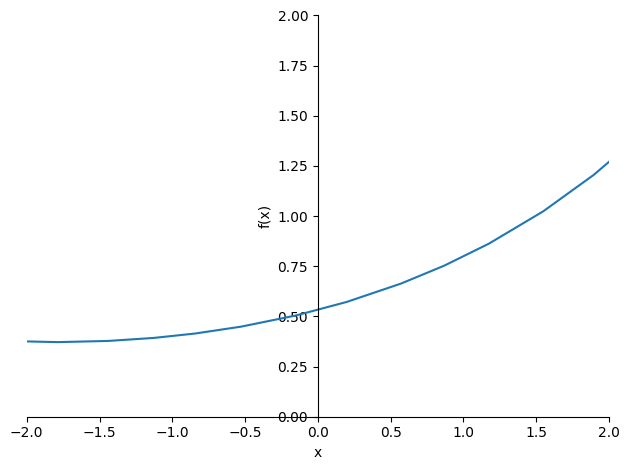

In [37]:
# Вторая производная функции 
dev2 = f(x).diff(x,2)
sp.plot(dev2, xlim=(-2,2),ylim=(0,2), ylabel="f(x)", xlabel="x");

Очевидно, что вторая производная монотонно возрастает на [-1,1], поэтому $M=f''(1)$

In [38]:
M = sp.N(dev2.subs(x,1))
print(f"M = {M}")
#Диаметр разбиения 
def delta_n(nodes):
    return max([abs(nodes[i] - nodes[i+1]) for i in range(len(nodes)-1)])
print(f"Итоговая оценка для равноотстоящих узлов: ||r_n(x)|| <= {delta_n(nodes)**2*M/4}")

M = 0.797950476378843
Итоговая оценка для равноотстоящих узлов: ||r_n(x)|| <= 0.0498719047736777


***

##### Далее построим сплайн первой степени с использованием узлов Чебышева и проделаем такую же оценку
##### 2) $ x_{k} = \frac {b-a}{2} \cos(\frac{(2k-1)\pi }{10}) + \frac{b+a}{2}$, k = $ \overline{1, 5}$

In [39]:
nodes_ch = sorted([round(sp.sympify((b-a)/2)*sp.cos((2*k-1)*sp.pi/10) + (b+a)/2,10) for k in range(1, 6)])
print(f"Узлы Чебышева на отрезке [-1,1] (упорядоченные): {nodes_ch}")

Узлы Чебышева на отрезке [-1,1] (упорядоченные): [-0.9510565163, -0.5877852523, 0, 0.5877852523, 0.9510565163]


In [40]:
print("Сплайн по узлам Чебышева: ")
spline5_1_ch = S_n_1(x,nodes_ch)

Сплайн по узлам Чебышева: 
S_5_1 для заданных узлов: 
0.398643877764698*x + 2.00098893302493 на интервале [-0.9510565163; -0.5877852523]
0.614091665355256*x + 2.12762596520638 на интервале [-0.5877852523; 0]
0.928995295702014*x + 2.12762596520638 на интервале [0; 0.5877852523]
1.23865780211054*x + 1.94561091077048 на интервале [0.5877852523; 0.9510565163]


Теперь так же, как и в случае с равноостоящими узлами, оценим погрешность приближения, однако $\delta_n$ уже будет другим

In [41]:
print(f"Итоговая оценка для узлов Чебышева: ||r_n(x)|| <= {delta_n(nodes_ch)**2*M/4}")

Итоговая оценка для узлов Чебышева: ||r_n(x)|| <= 0.0689212773149437


Видим, что равноостощие узлы дают лучшую оценку вследствие меньшего диаметра разбиения

***

***

### Задание 2: Для $ f(x),x  \in [a,b] $ построить естественный сплайн третьей степени
##### 1) Для набора узлов $ x_ {k} = a + k \frac {b-a}{4} $, k = $ \overline{0, 4}$ строим по определению


In [42]:
# Определим неизвестные коэффиценты
a0, a1, a2, a3 = sp.symbols("a0:4")
b0, b1, b2, b3 = sp.symbols("b0:4")
c0, c1, c2, c3 = sp.symbols("c0:4")
d0, d1, d2, d3 = sp.symbols("d0:4")
def S_5_3(nodes):
    #сначала определим кубические функции с неизвестными коэф. для каждого промежутка
    s01 = a0 + b0*x + c0*x**2 + d0*x**3
    s12 = a1 + b1*x + c1*x**2 + d1*x**3  
    s23 = a2 + b2*x + c2*x**2 + d2*x**3
    s34 = a3 + b3*x + c3*x**2 + d3*x**3
    #общий список уравнений системы
    equations = list()
    #5 уравнений из условий интерполяции
    int1 = s01.subs(x, nodes[0]) - f(x).subs(x,nodes[0])
    int2 = s12.subs(x, nodes[1]) - f(x).subs(x,nodes[1])
    int3 = s23.subs(x, nodes[2]) - f(x).subs(x,nodes[2])
    int4 = s34.subs(x, nodes[3]) - f(x).subs(x,nodes[3])
    int5 = s34.subs(x, nodes[4]) - f(x).subs(x,nodes[4])
    equations.extend([int1,int2,int3,int4,int5])
    # 3 уравнения из непрерывности сплайна
    cont1_1 = s01.subs(x, nodes[1]) - s12.subs(x,nodes[1])
    cont1_2 = s12.subs(x, nodes[2]) - s23.subs(x,nodes[2])
    cont1_3 = s23.subs(x, nodes[3]) - s34.subs(x,nodes[3])
    equations.extend([cont1_1,cont1_2,cont1_3])
    # 3 уравнения из непрерывности 1-й производной
    cont2_1 = s01.diff(x).subs(x, nodes[1]) - s12.diff(x).subs(x,nodes[1])
    cont2_2 = s12.diff(x).subs(x, nodes[2]) - s23.diff(x).subs(x,nodes[2])
    cont2_3 = s23.diff(x).subs(x, nodes[3]) - s34.diff(x).subs(x,nodes[3])
    equations.extend([cont2_1,cont2_2,cont2_3])
    # 3 уравнения из непрерывности 2-й производной
    cont3_1 = s01.diff(x,2).subs(x, nodes[1]) - s12.diff(x,2).subs(x,nodes[1])
    cont3_2 = s12.diff(x,2).subs(x, nodes[2]) - s23.diff(x,2).subs(x,nodes[2])
    cont3_3 = s23.diff(x,2).subs(x, nodes[3]) - s34.diff(x,2).subs(x,nodes[3])
    equations.extend([cont3_1,cont3_2,cont3_3])
    # 2 уравнения, определяющих естественный сплайн
    natur1 = s01.diff(x,2).subs(x, nodes[0])
    natur2 = s34.diff(x,2).subs(x, nodes[4])
    equations.extend([natur1,natur2])
    #Итого 16 уравнений и 16 неизвестных
    solve = list(sp.linsolve(equations, a0, a1, a2, a3, b0, b1, b2, b3, c0, c1, c2, c3, d0, d1, d2, d3))[0] #type: ignore
    spline = {f"[{nodes[i]}; {nodes[i+1]}]": sum([x**j *solve[i::4][j] for j in range(4)]) for i in range(len(nodes)-1)}
    return spline
spline5_3 = S_5_3(nodes)
print("Сплайн 3-й степени по равноотстоящим узлам: ")
spline5_3

Сплайн 3-й степени по равноотстоящим узлам: 


{'[-1.0; -0.5]': 0.190465819662462*x**3 + 0.571397458987386*x**2 + 0.93114745054846*x + 2.15674647093617,
 '[-0.5; 0.0]': -0.0424982261758484*x**3 + 0.221951390229921*x**2 + 0.756424416169727*x + 2.12762596520638,
 '[0.0; 0.5]': 0.139061444126893*x**3 + 0.221951390229921*x**2 + 0.756424416169727*x + 2.12762596520638,
 '[0.5; 1.0]': -0.287029037613507*x**3 + 0.861087112840521*x**2 + 0.436856554864427*x + 2.18088727542393}

***

##### 2) Для набора узлов $ x_{k} = \frac {b-a}{2} \cos(\frac{(2k-1)\pi }{10}) + \frac{b+a}{2}$, k = $ \overline{1..5}$ строим сплайн третьей степени с помощью <br>метода моментов.



##### Определим сплайны на каждом из $[x_{k-1}; x_k] k=\overline{1..5}$ по формуле: <br>$ g_k(x) = M_{k-1} \frac{\left(x-x_{k-1}\right)^2}{2}+\frac{M_k-M_{k-1}}{x_k-x_{k-1}} \frac{\left(x-x_{k-1}\right)^3}{6}+g_k^{\prime}\left(x_{k-1}\right)\left(x-x_{k-1}\right)+g_k\left(x_{k-1}\right)$, <br> где $M_i \equiv S^{\prime \prime}\left(x_i\right)$ а далее учтем оставшиеся условия для определения неизвестных коэффицентов.

In [43]:
# Определим неизвестные коэффиценты
m0, m1, m2, m3, m4 = sp.symbols("m0:5")
g1dev, g2dev, g3dev, g4dev = sp.symbols("gdev1:5")
gdev = [g1dev, g2dev, g3dev, g4dev]
M = [m0,m1,m2,m3,m4]
def S_5_3_momentum(nodes):
    #сначала определим кубические функции с неизвестными коэф. для каждого промежутка
    g1, g2, g3, g4 = tuple(M[k-1]*(x-nodes[k-1])**2/2 + \
                          (M[k]-M[k-1])*(x-nodes[k-1])**3/(nodes[k]-nodes[k-1])/6 + \
                          gdev[k-1]*(x-nodes[k-1]) + f(x).subs(x,nodes[k-1])
                          for k in range(1,len(gdev)+1))
    g = [g1,g2,g3,g4]
    #общий список уравнений системы
    equations = list()
    # Оставшееся условие интерполяции
    int5 = g4.subs(x,nodes[-1]) - f(x).subs(x,nodes[-1])
    equations.extend([int5])
    # 3 уравнения из непрерывности сплайна
    cont1_1 = g1.subs(x, nodes[1]) - g2.subs(x,nodes[1])
    cont1_2 = g2.subs(x, nodes[2]) - g3.subs(x,nodes[2])
    cont1_3 = g3.subs(x, nodes[3]) - g4.subs(x,nodes[3])
    equations.extend([cont1_1,cont1_2,cont1_3])
    # 3 уравнения из непрерывности 1-й производной
    cont2_1 = g1.diff(x).subs(x, nodes[1]) - g2.diff(x).subs(x,nodes[1])
    cont2_2 = g2.diff(x).subs(x, nodes[2]) - g3.diff(x).subs(x,nodes[2])
    cont2_3 = g3.diff(x).subs(x, nodes[3]) - g4.diff(x).subs(x,nodes[3])
    equations.extend([cont2_1,cont2_2,cont2_3])
    # 2 уравнения, определяющих естественный сплайн
    natur1 = g1.diff(x,2).subs(x, nodes[0])
    natur2 = g4.diff(x,2).subs(x, nodes[4])
    equations.extend([natur1,natur2])
    # #Итого 9 уравнений и 9 неизвестных
    solve = list(sp.linsolve(equations,m0,m1,m2,m3,m4,g1dev,g2dev,g3dev,g4dev))[0] #type: ignore 
    g1_ = g1.subs([(m0,solve[0]), (m1,solve[1]), (g1dev,solve[5])])
    spline = {f"[{nodes[i]}; {nodes[i+1]}]": \
                 sp.expand(sp.N(g[i].subs([(M[i], solve[i]), (M[i+1], solve[i+1]), (gdev[i],solve[5+i])]))) \
                 for i in range(len(nodes)-1)}
    return spline
spline5_3_ch = S_5_3_momentum(nodes_ch)
print("Сплайн 3-й степени по узлам Чебышева, построенный с помощью метода моментов: ")
spline5_3_ch



Сплайн 3-й степени по узлам Чебышева, построенный с помощью метода моментов: 


{'[-0.9510565163; -0.5877852523]': 0.246483005377383*x**3 + 0.703257805264116*x**2 + 1.03495441784261*x + 2.18208777816657,
 '[-0.5877852523; 0]': -0.0217029566410929*x**3 + 0.230350545205424*x**2 + 0.756986504928933*x + 2.12762596470472,
 '[0; 0.5877852523]': 0.105971164913469*x**3 + 0.230350545024148*x**2 + 0.756986505383443*x + 2.12762596520638,
 '[0.5877852523; 0.9510565163]': -0.382831830324234*x**3 + 1.09228412060732*x**2 + 0.250354661274672*x + 2.22688954066825}

***

***

In [65]:
# Сравним значения полинома Лагранжа и исходной функции в контрольных точках
def spk(spline, value): #функция определения значения сплайна относительно переданной точки
    for key, spline_k in spline.items():
        lb,rb = map(float, key.replace("[",'').replace("]","").replace(";","").split())
        if lb <= value <= rb:
            return spline_k
control_points = [-5/8, 5/7, 2/7]
for i, x_i in enumerate(control_points):
    print(f"Разница значений в контрольной точке x_{i+1} = {x_i}: ")
    print(f"Для сплайна первого порядка:", sp.sympify(f(x).subs(x,x_i) - spk(spline5_1,x_i).subs(x, x_i))) #type:ignore
    print(f"Для сплайна первого порядка (узлы Чебышева):", sp.sympify(f(x).subs(x,x_i) - spk(spline5_1_ch, x_i).subs(x, x_i))) #type:ignore
    print(f"Для сплайна третьего порядка :", sp.sympify(f(x).subs(x,x_i) - spk(spline5_3,x_i).subs(x, x_i))) #type:ignore
    print(f"Для сплайна третьего порядка(узлы Чебышева) :", sp.sympify(f(x).subs(x,x_i) - spk(spline5_3_ch,x_i).subs(x, x_i))) #type:ignore
    print("****"*16)

Разница значений в контрольной точке x_1 = -0.625: 
Для сплайна первого порядка: -0.0100477643940597
Для сплайна первого порядка (узлы Чебышева): -0.00259119667465924
Для сплайна третьего порядка : -0.00223568975946598
Для сплайна третьего порядка(узлы Чебышева) : -0.000529519464187000
****************************************************************
Разница значений в контрольной точке x_2 = 0.7142857142857143: 
Для сплайна первого порядка: -0.0218272552666399
Для сплайна первого порядка (узлы Чебышева): -0.0107308072582990
Для сплайна третьего порядка : -0.00801973596453243
Для сплайна третьего порядка(узлы Чебышева) : -0.00385046575946291
****************************************************************
Разница значений в контрольной точке x_3 = 0.2857142857142857: 
Для сплайна первого порядка: -0.0179749495080332
Для сплайна первого порядка (узлы Чебышева): -0.0256406133324911
Для сплайна третьего порядка : 0.00230345580660840
Для сплайна третьего порядка(узлы Чебышева) : 0.002228998

In [9]:
x, y = 0,0
for n in range(1,10000000):
    x = (1-2/n)*x - y/n + 4/n
    y=(1-1/n)*y - x/n + 3/n
print(x,y)

1.00379949300115 1.9938522913014267


In [30]:
import seaborn as sns
import numpy as np
def fun(n):
    return (np.sum(np.arange(1,2025)**(1/n))/2024)**n
for n in range(1,10000000):
    if n%1000000==0:
        print((np.log(fun(n))))

6.6151662030541
6.61516595725601
6.615165875835693
6.6151658349024185
6.6151658100312485
6.61516579352434
6.615165781575018
6.615165773945255
6.615165768084986


In [35]:
a = [2,2]
for i in range(10000):
    a.append(a[-1] + a[-2])

In [41]:
summ=0
for n in range(1,100):
    summ+=a[n]/(2023**n)
print(summ)

0.0009896088624754156


In [4]:
import math
import numpy as np
math.factorial

<function math.factorial(n, /)>

In [9]:
[10**i/math.factorial(i) for i in range(10+1)]

[1.0,
 10.0,
 50.0,
 166.66666666666666,
 416.6666666666667,
 833.3333333333334,
 1388.888888888889,
 1984.126984126984,
 2480.15873015873,
 2755.731922398589,
 2755.731922398589]

In [16]:
def factorial(number):
    factorial = 1
    while number > 1:
        factorial = factorial * number
        number = number - 1
    return factorial
for n in range(1,100):
    if n%10==0:
        print((np.sum([n**i/factorial(i) for i in range(n+1)]))/math.exp(n))

0.5830397501929855
0.5590925842313252
0.5483515125779114
0.541918178362537
0.5375166908531476
0.5342624723609587
0.5317305296811751
0.5296879611868244
0.5279950429761979


In [61]:
for elem in list(sol)[0]:
    print(elem.subs(s,30000)*100)

5
4
3


In [24]:
from sympy.solvers import solve
import sympy as sp

In [25]:
a,b,m = sp.symbols('a b m')
print(solve(100*(m+a)*b - m*(m+a+b)*(m+a+b-1), m, rational=True), f"a={a}; b={b}")
        

[-2*a/3 - 2*b/3 - (-1/2 - sqrt(3)*I/2)*(-1350*a*b + sqrt((-2700*a*b + 2*(2*a + 2*b - 1)**3 - (18*a + 18*b - 9)*(a**2 + 2*a*b - a + b**2 - 101*b))**2 - 4*(-3*a**2 - 6*a*b + 3*a - 3*b**2 + 303*b + (2*a + 2*b - 1)**2)**3)/2 + (2*a + 2*b - 1)**3 - (18*a + 18*b - 9)*(a**2 + 2*a*b - a + b**2 - 101*b)/2)**(1/3)/3 + 1/3 - (-3*a**2 - 6*a*b + 3*a - 3*b**2 + 303*b + (2*a + 2*b - 1)**2)/(3*(-1/2 - sqrt(3)*I/2)*(-1350*a*b + sqrt((-2700*a*b + 2*(2*a + 2*b - 1)**3 - (18*a + 18*b - 9)*(a**2 + 2*a*b - a + b**2 - 101*b))**2 - 4*(-3*a**2 - 6*a*b + 3*a - 3*b**2 + 303*b + (2*a + 2*b - 1)**2)**3)/2 + (2*a + 2*b - 1)**3 - (18*a + 18*b - 9)*(a**2 + 2*a*b - a + b**2 - 101*b)/2)**(1/3)), -2*a/3 - 2*b/3 - (-1/2 + sqrt(3)*I/2)*(-1350*a*b + sqrt((-2700*a*b + 2*(2*a + 2*b - 1)**3 - (18*a + 18*b - 9)*(a**2 + 2*a*b - a + b**2 - 101*b))**2 - 4*(-3*a**2 - 6*a*b + 3*a - 3*b**2 + 303*b + (2*a + 2*b - 1)**2)**3)/2 + (2*a + 2*b - 1)**3 - (18*a + 18*b - 9)*(a**2 + 2*a*b - a + b**2 - 101*b)/2)**(1/3)/3 + 1/3 - (-3*a**2 - 6*a